# Random Walk Generation

Recall that the stochastic model for asset returns is given by the Geometric Brownian Motion (GBM) process:

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

In [78]:
import numpy as np
import pandas as pd



def geometric_brownian_motion(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, start_price=100.0, prices=True):
    dt = 1 / steps_per_year
    n_steps = int(n_years*steps_per_year) + 1
    rets_plus_1 = np.random.normal(loc=(1+mu)**dt, scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    rets = start_price * pd.DataFrame(rets_plus_1).cumprod() if prices else pd.DataFrame(rets_plus_1 - 1)
    return rets

<AxesSubplot:>

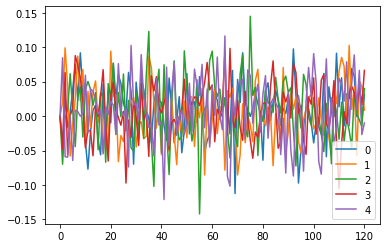

In [79]:
p = geometric_brownian_motion(n_scenarios=5, prices=False)
p.plot()

<AxesSubplot:>

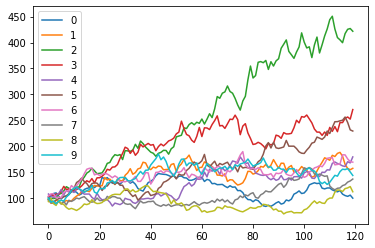

In [58]:
p = geometric_brownian_motion_prices(n_scenarios=10, start_price=100)
p.plot()

In [80]:
import ipywidgets as widgets
from IPython.display import display

In [96]:
def dynamic_gbm(n_scenarios, mu, sigma):
    start_price = 100
    prices = geometric_brownian_motion(n_scenarios=n_scenarios, mu=mu, sigma=sigma, start_price=start_price)
    ax = prices.plot(legend=False, color="indianred", alpha=0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=start_price, ls=":", color="black")
    ax.plot(0, start_price, marker="o", color="darkred", alpha=0.2)

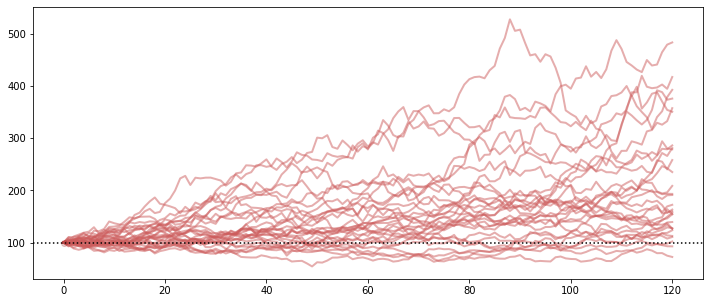

In [97]:
dynamic_gbm(30, 0.07, 0.15)

In [98]:
gbm_controls = widgets.interactive(dynamic_gbm,
                                   n_scenarios=(1, 20, 5),
                                   mu=(-0.2, 0.2, 0.01),
                                   sigma=(0, 0.3, 0.01),
                                  )
display(gbm_controls)

interactive(children=(IntSlider(value=6, description='n_scenarios', max=20, min=1, step=5), FloatSlider(value=…